### Importing the necessary libraries


In [233]:
#importing data manipulation libraries
import pandas as pd
import numpy as np

#data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#feature engineering libraries
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
#model building libraries
from sklearn.model_selection import train_test_split

The data manipulation libraries are used to perform sanity checks on the data while the data visualization librares are used for plotting graphs

---
###### Importing the dataset

In [234]:
#reading the data
df = pd.read_csv('/content/drive/MyDrive/10academy/telecom.csv')
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [235]:
#creating a copy of the data
data = df.copy()
data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


The *df* dataframe contains the original data while the *data* dataframe contains a copy of the data. The reason for this is so that the original copy of the DataFrame that remains unchanged even if the new one is modified.


---
### Data sanity checks

*shape of the data*

In [236]:
#checking the shape of the data
shape = df.shape
print('The dataframe contains', shape [0], 'rows and', shape[1] ,'columns')

The dataframe contains 150001 rows and 55 columns


*missing values*

In [237]:
#checking null values in the dataframe
df.isnull().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

Numerous columns have missing values. The column with the largest number of missing values is Nb of sec with 37500B < Vol UL with 130254 missing values


---
*Datatypes of the columns*

In [238]:
#checking different datatypes in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

There are 50 columns with float datatype in the dataframe and 5 columns with object datatype in the dataframe.

---

*statistical summary of the dataframe*

In [239]:
#describing the numerical columns of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Bearer Id,149010.0,1.013887e+19,2.893173e+18,6.917538e+18,7.349883e+18,7.349883e+18,1.304243e+19,1.318654e+19
Start ms,150000.0,4.991882e+02,2.886118e+02,0.000000e+00,2.500000e+02,4.990000e+02,7.490000e+02,9.990000e+02
End ms,150000.0,4.988009e+02,2.880977e+02,0.000000e+00,2.510000e+02,5.000000e+02,7.500000e+02,9.990000e+02
Dur. (ms),150000.0,1.046086e+05,8.103762e+04,7.142000e+03,5.744050e+04,8.639900e+04,1.324302e+05,1.859336e+06
IMSI,149431.0,2.082016e+14,2.148809e+10,2.040471e+14,2.082014e+14,2.082015e+14,2.082018e+14,2.140743e+14
MSISDN/Number,148935.0,4.188282e+10,2.447443e+12,3.360100e+10,3.365130e+10,3.366371e+10,3.368349e+10,8.823971e+14
IMEI,149429.0,4.847455e+13,2.241637e+13,4.400152e+11,3.546071e+13,3.572201e+13,8.611970e+13,9.900120e+13
Avg RTT DL (ms),122172.0,1.097957e+02,6.197827e+02,0.000000e+00,3.200000e+01,4.500000e+01,7.000000e+01,9.692300e+04
Avg RTT UL (ms),122189.0,1.766288e+01,8.479352e+01,0.000000e+00,2.000000e+00,5.000000e+00,1.500000e+01,7.120000e+03
Avg Bearer TP DL (kbps),150000.0,1.330005e+04,2.397188e+04,0.000000e+00,4.300000e+01,6.300000e+01,1.971075e+04,3.781600e+05


In [240]:
# describing object columns
df.describe(include = 'object').T

,count,unique,top,freq
Start,150000,9997,4/26/2019 7:25,203
End,150000,6403,4/25/2019 0:01,1150
Last Location Name,148848,45547,D41377B,80
Handset Manufacturer,149429,170,Apple,59565
Handset Type,149429,1396,Huawei B528S-23A,19752


### Univariet analysis
Here, univariet analysis is done before filling the missing values to get a feel of the data and understand it well before modifying it.

---
Getting the distribution of handsets usage among customers

In [241]:
#getting the valuecount of  handset types
handset_count = df['Handset Type'].value_counts()
handset_count[0:11]

Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Samsung Galaxy A5 Sm-A520F       3724
Name: Handset Type, dtype: int64

The output above shows the top 10 handsets. The most used handset is Huawei B528S-23A  with 19752 people using the handset.

The number of undefined handsets used is 8987

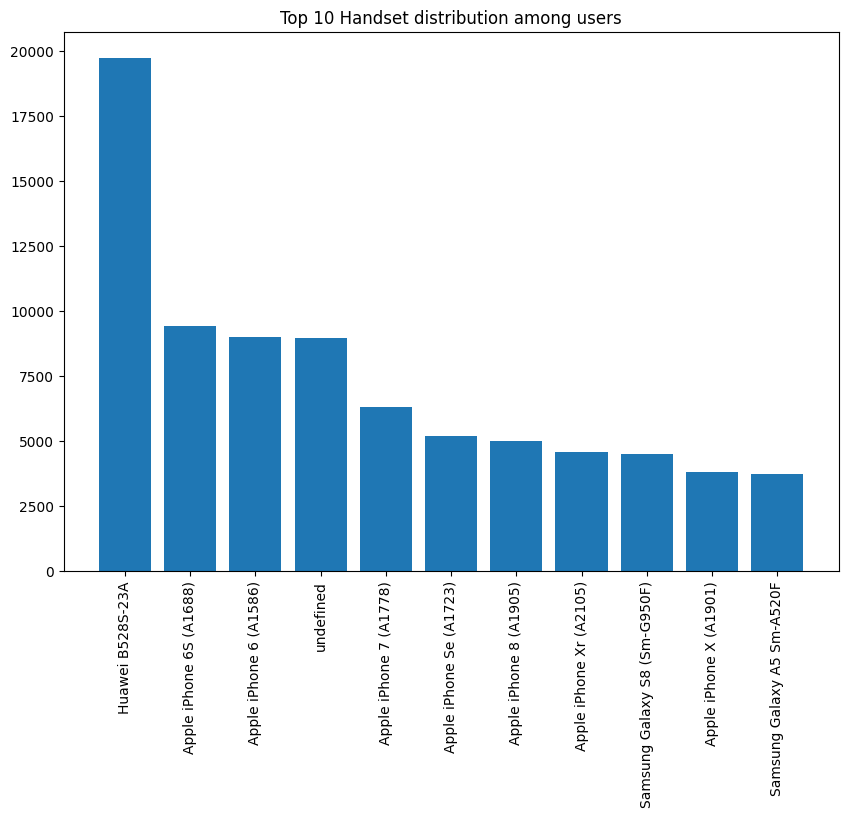

In [242]:
#plotting the handset type distribution
plt.figure(figsize = (10, 7))
plt.bar(handset_count.index[:11], handset_count.values[:11])
plt.xticks(rotation = 90)
plt.title('Top 10 Handset distribution among users')
plt.show()

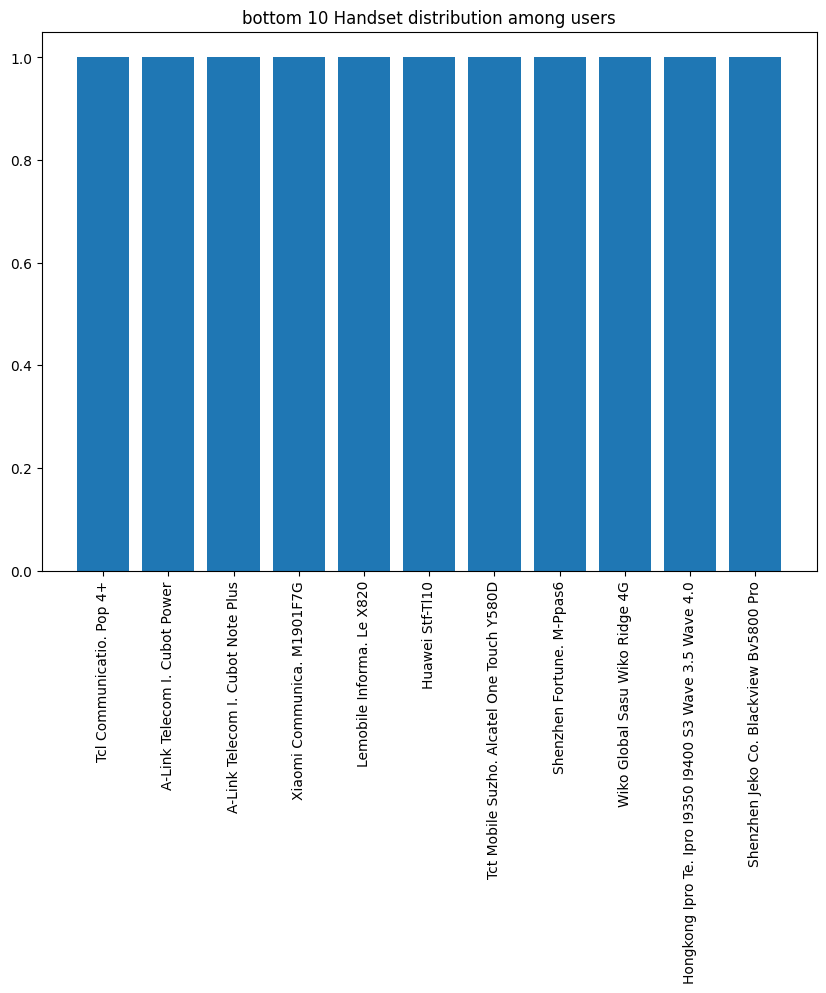

In [243]:
#checking the bottom 10 handset distribution

plt.figure(figsize = (10, 7))
plt.bar(handset_count.index[-11:], handset_count.values[-11:])
plt.xticks(rotation = 90)
plt.title('bottom 10 Handset distribution among users')
plt.show()

**Getting the top 3 handset manufacturer**

In [244]:
#getting the top3 handset manufacturer
top_3 = df['Handset Manufacturer'].value_counts()
print('The top 3 handset manufacturers are: \n',top_3[:3])

The top 3 handset manufacturers are: 
 Apple      59565
Samsung    40839
Huawei     34423
Name: Handset Manufacturer, dtype: int64


**Getting the top 5 handsets per top 3 manufacturers**

*Apple*

In [245]:
#getting the top 5 handsets of apple
apple_handsets = df.loc[df['Handset Manufacturer'] == 'Apple', 'Handset Type'].value_counts()
print('The top 5 apple handsets include: \n', apple_handsets[:5])

The top 5 apple handsets include: 
 Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: Handset Type, dtype: int64


*samsung*

In [246]:
#getting the top 5 handsets in samsang
samsung_handsets = df.loc[df['Handset Manufacturer']== 'Samsung', 'Handset Type'].value_counts()
print('The top 5 samsung handsets include: \n', samsung_handsets[:5])

The top 5 samsung handsets include: 
 Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: Handset Type, dtype: int64


*Huawei*

In [247]:
#getting the top 5 handsets in huawei
hua_hand = df.loc[df['Handset Manufacturer']== 'Huawei', 'Handset Type'].value_counts()
print('The top 5 Huawei handsets include: \n', hua_hand[:5])

The top 5 Huawei handsets include: 
 Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: Handset Type, dtype: int64


From the above output, I think that the company should invest on Huawei B528S-23A model only. The reasons for this are:
> - It is the top most handset used by people.

The analysis have shown that the other Huawei handset models are performing poorly leaving the B528S-23A as the only best performing handset type when it comes to Huawei

When It comes to apple, it seems like their handsets have an equal popularity when we comapre them to each other. The company should invest in the following models
> - Apple iPhone 6S (A1688) which has  9419 users
> - Apple iPhone 6 (A1586)  which has   9023 users
> - Apple iPhone 7 (A1778)  which has   6326 users

These are the top best performing apple models

The company should invest in  the Samsung Galaxy S8 (Sm-G950F) model. This is the top most Samsung handset when it comes to popularity. It has  4520 users

### Data Agregation
---
**Agreggating per user the number of XDR sessions**

In [248]:
#grouping the number of XDR sessions per user
xdr_group = pd.DataFrame(df.groupby('MSISDN/Number')['Bearer Id'].count())
xdr_group.rename(columns = {'Bearer Id':'number_of_sessions'}, inplace = True)
print(xdr_group)

               number_of_sessions
MSISDN/Number                    
3.360100e+10                    1
3.360100e+10                    1
3.360100e+10                    1
3.360101e+10                    1
3.360101e+10                    2
...                           ...
3.379000e+10                    1
3.379000e+10                    1
3.197021e+12                    1
3.370000e+14                    1
8.823971e+14                    1

[106856 rows x 1 columns]


**Agregating the total session duration per user**

In [249]:
#grouping the total duration of xdr session per user
session_tot = pd.DataFrame(df.groupby('MSISDN/Number')['Dur. (ms)'].sum())
session_tot.rename(columns = {'Dur. (ms)':'total_of_sessions'}, inplace = True)
print(session_tot)

               total_of_sessions
MSISDN/Number                   
3.360100e+10            116720.0
3.360100e+10            181230.0
3.360100e+10            134969.0
3.360101e+10             49878.0
3.360101e+10             37104.0
...                          ...
3.379000e+10              8810.0
3.379000e+10            140988.0
3.197021e+12            877385.0
3.370000e+14            253030.0
8.823971e+14            869844.0

[106856 rows x 1 columns]


**Agregating the total DL per user**

In [250]:
#grouping the total dl per user
dl_tot = pd.DataFrame(df.groupby('MSISDN/Number')['Total DL (Bytes)'].sum())
dl_tot.rename(columns = {'Total DL (Bytes)':'total_dl'}, inplace = True)
print(dl_tot)

                   total_dl
MSISDN/Number              
3.360100e+10   8.426375e+08
3.360100e+10   1.207552e+08
3.360100e+10   5.566597e+08
3.360101e+10   4.019932e+08
3.360101e+10   1.363130e+09
...                     ...
3.379000e+10   6.879252e+08
3.379000e+10   4.445751e+08
3.197021e+12   1.948281e+08
3.370000e+14   5.396350e+08
8.823971e+14   7.869760e+07

[106856 rows x 1 columns]


**Agregating the total UL per user**

In [251]:
#grouping the total dl per user
ul_tot = pd.DataFrame(df.groupby('MSISDN/Number')['Total UL (Bytes)'].sum())
ul_tot.rename(columns = {'Total uL (Bytes)':'total_ul'}, inplace = True)
print(ul_tot)

               Total UL (Bytes)
MSISDN/Number                  
3.360100e+10         36053108.0
3.360100e+10         36104459.0
3.360100e+10         39306820.0
3.360101e+10         20327526.0
3.360101e+10         94280527.0
...                         ...
3.379000e+10         26716429.0
3.379000e+10         35732243.0
3.197021e+12         37295915.0
3.370000e+14         56652839.0
8.823971e+14         60456049.0

[106856 rows x 1 columns]


**Getting the total data volume for each application for the users**

*Summation of various DL and UL columns*

In [252]:
#adding 'Social Media DL (Bytes)' and 'Social Media UL (Bytes)'
df['social_tot'] = df['Social Media DL (Bytes)'] + df['Social Media UL (Bytes)']

#adding google dl and ul total
df['goog_tot'] = df['Google DL (Bytes)'] + df['Google UL (Bytes)']

#Emai
df['Email_tot'] = df['Email DL (Bytes)'] + df['Email UL (Bytes)']

#youtube
df['you_tot'] = df['Youtube DL (Bytes)'] + df['Youtube UL (Bytes)']

#netflix
df['netflix_tot'] = df['Netflix DL (Bytes)'] + df['Netflix UL (Bytes)']

#gaming
df['gaming_tot'] = df['Gaming DL (Bytes)'] + df['Gaming UL (Bytes)']

#other
df['other_tot'] = df['Other DL (Bytes)'] + df['Other UL (Bytes)']

df.head()


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),social_tot,goog_tot,Email_tot,you_tot,netflix_tot,gaming_tot,other_tot
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,8814393.0,36749741.0,308879636.0,1570185.0,2905912.0,3701304.0,18355943.0,17855187.0,292426453.0,180558843.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,15055145.0,53800391.0,653384965.0,1933278.0,4414096.0,937385.0,39359124.0,35565545.0,609920783.0,541959383.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,4215763.0,27883638.0,279807335.0,1726277.0,10229119.0,3363124.0,34425237.0,23751202.0,229980251.0,414908351.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,12797283.0,43324218.0,846028530.0,657493.0,11811761.0,2070983.0,36534765.0,15092588.0,810387875.0,761837216.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,13910322.0,38542814.0,569138589.0,912788.0,7748843.0,2110349.0,34222253.0,17539799.0,531237049.0,564619822.0


*Grouping per session*

In [253]:
#grouping the users dl & ul per social media
xdr_soc = pd.DataFrame(df.groupby(['MSISDN/Number', 'Bearer Id'])['social_tot'].sum())
print(xdr_soc)

                            social_tot
MSISDN/Number Bearer Id               
3.360100e+10  1.311448e+19   2232135.0
              7.349883e+18   2660565.0
              7.349883e+18   3195623.0
3.360101e+10  1.304243e+19    280294.0
              7.277826e+18   1524057.0
...                                ...
3.379000e+10  1.304243e+19    300183.0
              1.311448e+19    498569.0
3.197021e+12  7.277826e+18    715224.0
3.370000e+14  7.349883e+18    521566.0
8.823971e+14  7.277826e+18   1546088.0

[147028 rows x 1 columns]


In [254]:
#grouping the users dl & ul per google
xdr_goog = pd.DataFrame(df.groupby(['MSISDN/Number', 'Bearer Id'])['goog_tot'].sum())
print(xdr_goog)

                              goog_tot
MSISDN/Number Bearer Id               
3.360100e+10  1.311448e+19   4389005.0
              7.349883e+18   5334863.0
              7.349883e+18   3443126.0
3.360101e+10  1.304243e+19   9678493.0
              7.277826e+18  10170635.0
...                                ...
3.379000e+10  1.304243e+19   7531269.0
              1.311448e+19   5429705.0
3.197021e+12  7.277826e+18  10438660.0
3.370000e+14  7.349883e+18   9830617.0
8.823971e+14  7.277826e+18   9218647.0

[147028 rows x 1 columns]


In [255]:
#grouping the users dl & ul per Email
xdr_em = pd.DataFrame(df.groupby(['MSISDN/Number', 'Bearer Id'])['Email_tot'].sum())
print(xdr_em)

                            Email_tot
MSISDN/Number Bearer Id              
3.360100e+10  1.311448e+19  1331362.0
              7.349883e+18  3307781.0
              7.349883e+18  3205380.0
3.360101e+10  1.304243e+19  2284670.0
              7.277826e+18  1413685.0
...                               ...
3.379000e+10  1.304243e+19  1006915.0
              1.311448e+19  2514097.0
3.197021e+12  7.277826e+18  1520771.0
3.370000e+14  7.349883e+18  3318582.0
8.823971e+14  7.277826e+18  3330974.0

[147028 rows x 1 columns]


In [256]:
#grouping the users dl & ul per youtube
xdr_you = pd.DataFrame(df.groupby(['MSISDN/Number', 'Bearer Id'])['you_tot'].sum())
print(xdr_you)

                               you_tot
MSISDN/Number Bearer Id               
3.360100e+10  1.311448e+19  21624548.0
              7.349883e+18  12432223.0
              7.349883e+18  21333570.0
3.360101e+10  1.304243e+19   6977321.0
              7.277826e+18  20492482.0
...                                ...
3.379000e+10  1.304243e+19  26647843.0
              1.311448e+19  19851572.0
3.197021e+12  7.277826e+18  11959905.0
3.370000e+14  7.349883e+18  36734940.0
8.823971e+14  7.277826e+18  40940710.0

[147028 rows x 1 columns]


In [257]:
#grouping the users dl & ul per netflix
xdr_net = pd.DataFrame(df.groupby(['MSISDN/Number', 'Bearer Id'])['netflix_tot'].sum())
print(xdr_net)

                            netflix_tot
MSISDN/Number Bearer Id                
3.360100e+10  1.311448e+19   27180981.0
              7.349883e+18   11221763.0
              7.349883e+18   19353900.0
3.360101e+10  1.304243e+19    1942092.0
              7.277826e+18   21973110.0
...                                 ...
3.379000e+10  1.304243e+19   14902538.0
              1.311448e+19    8531060.0
3.197021e+12  7.277826e+18   26592300.0
3.370000e+14  7.349883e+18   30905042.0
8.823971e+14  7.277826e+18   28846230.0

[147028 rows x 1 columns]


In [258]:
#grouping the users dl & ul per gaming
xdr_game = pd.DataFrame(df.groupby(['MSISDN/Number', 'Bearer Id'])['gaming_tot'].sum())
print(xdr_game)

                             gaming_tot
MSISDN/Number Bearer Id                
3.360100e+10  1.311448e+19  812458661.0
              7.349883e+18  119750078.0
              7.349883e+18  538827713.0
3.360101e+10  1.304243e+19  391126127.0
              7.277826e+18  802565189.0
...                                 ...
3.379000e+10  1.304243e+19  660361359.0
              1.311448e+19  437003292.0
3.197021e+12  7.277826e+18  178048738.0
3.370000e+14  7.349883e+18  510142695.0
8.823971e+14  7.277826e+18   43070260.0

[147028 rows x 1 columns]


In [259]:
#grouping the users dl & ul per others
xdr_other = pd.DataFrame(df.groupby(['MSISDN/Number', 'Bearer Id'])['other_tot'].sum())
print(xdr_other)

                              other_tot
MSISDN/Number Bearer Id                
3.360100e+10  1.311448e+19  386570872.0
              7.349883e+18  281710071.0
              7.349883e+18  501693672.0
3.360101e+10  1.304243e+19   35279702.0
              7.277826e+18   85988660.0
...                                 ...
3.379000e+10  1.304243e+19  295282817.0
              1.311448e+19  211115113.0
3.197021e+12  7.277826e+18  470526473.0
3.370000e+14  7.349883e+18  149188439.0
8.823971e+14  7.277826e+18  401360457.0

[147028 rows x 1 columns]


### EDA

---
**Missing value treatment**

In [260]:
#getting the missing values
df.isnull().sum()

Bearer Id      991
Start            1
Start ms         1
End              1
End ms           1
              ... 
Email_tot        0
you_tot          0
netflix_tot      0
gaming_tot       0
other_tot        0
Length: 62, dtype: int64

In [261]:
#filling the numeric missing values with the mean


def fill_na(df):
  """
  A function that takes a column,
  checks if the column is numeric
  it then takes the mean of the column
  fills missing values in the column with the mean
  """
  for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
      col_mean = df[col].mean()
      df[col].fillna(value = col_mean, inplace = True)


  return df


#applying the function
df_fill = fill_na(df)

print('*' * 50)
df_fill.isnull().sum()


**************************************************


Bearer Id      0
Start          1
Start ms       0
End            1
End ms         0
              ..
Email_tot      0
you_tot        0
netflix_tot    0
gaming_tot     0
other_tot      0
Length: 62, dtype: int64

**Bivariet Analysis**

In [262]:
#other
df['all_tot'] = df['Total DL (Bytes)'] + df['Total UL (Bytes)']
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Total UL (Bytes),Total DL (Bytes),social_tot,goog_tot,Email_tot,you_tot,netflix_tot,gaming_tot,other_tot,all_tot
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,36749741.0,308879636.0,1570185.0,2905912.0,3701304.0,18355943.0,17855187.0,292426453.0,180558843.0,345629377.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,53800391.0,653384965.0,1933278.0,4414096.0,937385.0,39359124.0,35565545.0,609920783.0,541959383.0,707185356.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,27883638.0,279807335.0,1726277.0,10229119.0,3363124.0,34425237.0,23751202.0,229980251.0,414908351.0,307690973.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,43324218.0,846028530.0,657493.0,11811761.0,2070983.0,36534765.0,15092588.0,810387875.0,761837216.0,889352748.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,38542814.0,569138589.0,912788.0,7748843.0,2110349.0,34222253.0,17539799.0,531237049.0,564619822.0,607681403.0


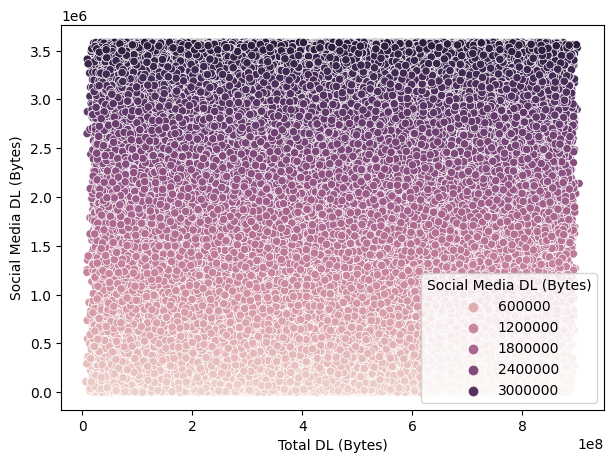

In [263]:
plt.figure(figsize = (7,5))
sns.scatterplot(data = df, x = 'Total DL (Bytes)', y='Social Media DL (Bytes)', hue = 'Social Media DL (Bytes)')
plt.show()

**Decile rank**

In [264]:
#getting the variables we need
df_sess = df[['MSISDN/Number','Dur. (ms)', 'all_tot']]
#grouping by msisdn
sess_group = pd.DataFrame(df_sess.groupby('MSISDN/Number')['Dur. (ms)'].sum())

#performing the decile cut
sess_group['decile'] = pd.qcut(sess_group['Dur. (ms)'], q = [0.1, 0.2,0.3,0.4,0.5,1], labels=False)
print(sess_group)

                  Dur. (ms)  decile
MSISDN/Number                      
3.360100e+10   1.167200e+05     4.0
3.360100e+10   1.812300e+05     4.0
3.360100e+10   1.349690e+05     4.0
3.360101e+10   4.987800e+04     0.0
3.360101e+10   3.710400e+04     0.0
...                     ...     ...
3.379000e+10   1.409880e+05     4.0
4.188282e+10   7.255100e+07     4.0
3.197021e+12   8.773850e+05     4.0
3.370000e+14   2.530300e+05     4.0
8.823971e+14   8.698440e+05     4.0

[106857 rows x 2 columns]


In [265]:
#merging the two df to get get a df with the variables we need
df_merg = pd.merge(sess_group, df_sess[['all_tot', 'MSISDN/Number']], on = 'MSISDN/Number')
df_merg.sort_values(by = 'all_tot', ascending = False ).head()
#df_merg.head()

,MSISDN/Number,Dur. (ms),decile,all_tot
105974,3.367492e+10,306979.0,4.0,955984776.0
79424,3.366469e+10,432000.0,4.0,952641334.0
97135,3.366855e+10,345600.0,4.0,952307464.0
44809,3.365881e+10,431996.0,4.0,951775502.0
93980,3.366783e+10,146623.0,4.0,950760661.0


In [266]:
#grouping the df_merge per class
df_merg_sum = pd.DataFrame(df_merg.groupby('decile')['all_tot'].sum())
df_merg_sum

,all_tot
decile,
0.0,6.110082e+12
1.0,6.536402e+12
2.0,6.034241e+12
3.0,5.144182e+12
4.0,4.510168e+13


*Correlation matrix*

In [267]:
#selection of columns
df_corr = df[['Social Media DL (Bytes)', 'Social Media UL (Bytes)',
       'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)',
       'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
       'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)',
       'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)',
       'Total UL (Bytes)', 'Total DL (Bytes)']]

#getting the correlation
correl = df_corr.corr()
print(correl)

                         Social Media DL (Bytes)  Social Media UL (Bytes)  \
Social Media DL (Bytes)                 1.000000                -0.000555   
Social Media UL (Bytes)                -0.000555                 1.000000   
Google DL (Bytes)                      -0.001954                 0.003542   
Google UL (Bytes)                       0.000186                 0.001085   
Email DL (Bytes)                        0.004745                 0.004823   
Email UL (Bytes)                       -0.002518                -0.001427   
Youtube DL (Bytes)                     -0.001389                -0.001786   
Youtube UL (Bytes)                      0.002345                -0.002368   
Netflix DL (Bytes)                     -0.001817                -0.000772   
Netflix UL (Bytes)                      0.003457                -0.002493   
Gaming DL (Bytes)                       0.001018                 0.000210   
Gaming UL (Bytes)                       0.003095                 0.000844   

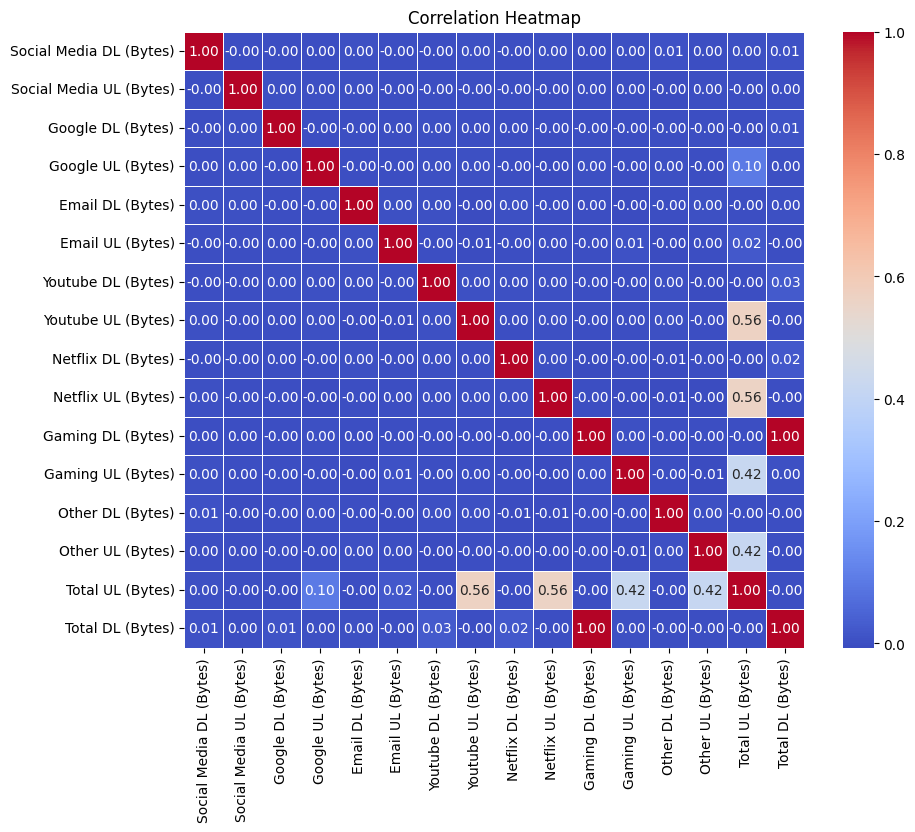

In [268]:
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correl, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [269]:
#getting the columns
df.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [270]:
#applications to track
social_media =df[['Bearer Id','Social Media DL (Bytes)','Social Media UL (Bytes)' ,'Google DL (Bytes)', 'Google UL (Bytes)','Email DL (Bytes)','Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
       'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)',
       'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)']]
# List of columns related to xDR data
xDR_columns = ['Social Media DL (Bytes)', 'Social Media UL (Bytes)',
               'Google DL (Bytes)', 'Google UL (Bytes)',
               'Email DL (Bytes)', 'Email UL (Bytes)',
               'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
               'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
               'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
               'Other DL (Bytes)', 'Other UL (Bytes)']

#adding the sessions into a column
social_media['Is_xDR_Session'] = social_media[xDR_columns].sum(axis=1)


print(social_media.head())


      Bearer Id  Social Media DL (Bytes)  Social Media UL (Bytes)  \
0  1.311448e+19                1545765.0                  24420.0   
1  1.311448e+19                1926113.0                   7165.0   
2  1.311448e+19                1684053.0                  42224.0   
3  1.311448e+19                 644121.0                  13372.0   
4  1.311448e+19                 862600.0                  50188.0   

   Google DL (Bytes)  Google UL (Bytes)  Email DL (Bytes)  Email UL (Bytes)  \
0          1634479.0          1271433.0         3563542.0          137762.0   
1          3493924.0           920172.0          629046.0          308339.0   
2          8535055.0          1694064.0         2690151.0          672973.0   
3          9023734.0          2788027.0         1439754.0          631229.0   
4          6248284.0          1500559.0         1936496.0          173853.0   

   Youtube DL (Bytes)  Youtube UL (Bytes)  Netflix DL (Bytes)  \
0          15854611.0           2501332.0    

<ipython-input-270-c14e9c143958>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  social_media['Is_xDR_Session'] = social_media[xDR_columns].sum(axis=1)


In [271]:
#grouping the bearer Id and the sum column to get the number of sessions per user
session_per_user = social_media.groupby('Bearer Id')['Is_xDR_Session'].sum()
print(session_per_user)

Bearer Id
6.917538e+18    1.213178e+09
6.917538e+18    1.249851e+09
6.917538e+18    1.342862e+09
6.917538e+18    8.996960e+08
6.917538e+18    1.332063e+09
                    ...     
1.318654e+19    8.765870e+08
1.318654e+19    7.944525e+08
1.318654e+19    1.605869e+09
1.318654e+19    4.446182e+08
1.318654e+19    8.136509e+08
Name: Is_xDR_Session, Length: 134709, dtype: float64


**Converting text columns to numeric columns**

In [272]:
df_text = df.select_dtypes(include = 'object')
df_text.columns

Index(['Start', 'End', 'Last Location Name', 'Handset Manufacturer',
       'Handset Type'],
      dtype='object')

In [273]:
#getting the handset manufacturer unique values
df['Handset Manufacturer'].unique()

array(['Samsung', 'undefined', 'Huawei', 'Apple', 'Zte',
       'TP-Link Technologies Co Ltd', 'Ertebat Hamrah Guya Arvand',
       'Wiko Global Sasu', nan, 'TCL Communication Ltd',
       'Oneplus Technology (Shenzhen) Co Ltd', 'Zebra Technologies Corp.',
       'Nokia', 'Wiko', 'Tcl Communication Ltd', 'ZTE', 'Lenovo',
       'Asustek', 'Xiaomi Communications Co Ltd', 'Rim', 'Hmd Global Oy',
       'Sony Mobile Communications AB', 'D-Link Corporation', 'Wct',
       'Dn Electronics', 'Sony Mobile Communications Ab', 'Netgear Inc',
       'Neel Enterprise', 'Teletalk Pvt Ltd', 'DDM Brands LLC',
       'Tp-Link Technologies Co Ltd', 'Sierra Wireless', 'Google Inc',
       'Shenzhen Chainway Information Technology Co Ltd',
       'Microsoft Mobile Oy', 'Htc', 'Crosscall',
       'Shenzhen Kdi Communication Co Ltd',
       'Simcom Wireless Solutions Co Ltd',
       'Qingdao Hisense Communications Co Ltd', 'Lg', 'Archos Sa',
       'Hewlett-Packard', 'Spa Condor Electronics',
       'Sona

In [274]:
#getting the unique values of handset type
df['Handset Type'].unique()

array(['Samsung Galaxy A5 Sm-A520F', 'Samsung Galaxy J5 (Sm-J530)',
       'Samsung Galaxy A8 (2018)', ..., 'Asustek Asus Zb500Kg',
       'Huawei Mediapad T5 10 Pro',
       'Shenzhen Jeko Co. Blackview Bv5800 Pro'], dtype=object)

**scaling the dataset**

In [275]:
scaler = StandardScaler()

# Getting the numeric columns
df_numeric = df.select_dtypes(include=['number'])

# Scaling the data
df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns = df_numeric.columns)
df_scaled.head()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Total UL (Bytes),Total DL (Bytes),social_tot,goog_tot,Email_tot,you_tot,netflix_tot,gaming_tot,other_tot,all_tot
0,1.031911,0.938332,0.566475,21.213047,-0.008932,-0.003370,-0.578959,-0.121206,-1.654637e-01,-0.553863,...,-0.387668,-0.597047,-0.249184,-1.393860,1.346461,-0.463680,-0.515444,-0.565147,-1.022770,-0.614351
1,1.031911,-0.915382,0.372095,15.554551,0.012569,-0.003363,-0.566766,-0.080087,-1.654637e-01,-0.554155,...,1.124409,0.814043,0.101413,-0.964961,-1.233975,1.807728,1.396959,0.735957,0.462841,0.865130
2,1.031911,-1.726165,0.531765,15.513311,-0.061789,-0.003331,-0.589672,0.000000,-4.642269e-17,-0.554572,...,-1.173927,-0.716127,-0.098464,0.688721,1.030731,1.274148,0.121220,-0.821054,-0.059428,-0.769595
3,1.031911,-0.045696,-1.137819,15.016588,-0.011065,-0.003335,-0.586315,0.000000,-4.642269e-17,-0.552987,...,0.195366,1.603109,-1.130464,1.138794,-0.175631,1.502285,-0.813756,1.557480,1.366694,1.610557
4,1.031911,0.228030,1.580027,12.147531,-0.011108,-0.003355,-0.584063,0.000000,-4.642269e-17,-0.554572,...,-0.228656,0.468971,-0.883956,-0.016623,-0.138878,1.252196,-0.549500,0.413508,0.555991,0.457962


In [276]:
#performing pca on the numeric columns
#initializing the pca
n_components = 30
pca = PCA(n_components = n_components)

#applying pca on the numeric data
df_pca = pca.fit_transform(df_scaled)
# Create a DataFrame with the principal components
columns = [f"PC{i+1}" for i in range(n_components)]
pca_df = pd.DataFrame(data=df_pca, columns=columns)

# Optional: Check the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

Explained Variance Ratio: [0.1297646  0.06894988 0.05087289 0.04395001 0.04242511 0.03481772
 0.03469497 0.03449255 0.03429168 0.03408463 0.03018427 0.02907569
 0.02732131 0.025226   0.02511567 0.02414844 0.01969508 0.01933106
 0.01816835 0.01748296 0.01730906 0.01728085 0.01723779 0.017189
 0.01712157 0.01704939 0.01654183 0.01608015 0.01514133 0.01282265]


In [277]:
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
0,-3.593114,1.251957,3.994901,2.611657,18.853183,2.235087,1.323677,-1.074134,2.016867,0.967998,...,0.797645,0.078204,-0.219383,0.432066,0.527436,2.745353,1.022326,-1.084594,-0.109005,0.382969
1,-2.905003,-1.652216,2.920435,-1.785659,14.286674,-0.247875,-0.879471,-2.543958,-0.124371,0.020736,...,-0.448626,1.697273,0.822517,0.313204,-0.079752,0.052097,0.579964,-0.727002,1.043009,0.210334
2,-2.920468,1.560814,2.973108,1.240526,14.001638,0.440775,-0.236642,1.295064,1.260392,0.363415,...,0.321196,0.120114,0.554551,-0.102351,1.287645,-0.634298,0.473630,-0.665121,1.759062,0.156895
3,-2.897431,-3.164198,2.862327,0.616380,13.705005,-1.241744,-2.791365,0.859074,1.689568,-0.825579,...,1.358019,0.655840,1.662659,-0.617296,-0.165499,0.531089,0.723535,-0.762118,-0.717171,0.133485
4,-2.549569,-0.860400,2.362350,0.743104,11.116983,-0.449202,-1.695006,-0.353544,1.627333,0.057641,...,-0.477477,-1.291656,1.449988,0.342362,0.168609,-0.072308,0.298530,-0.492557,1.098850,0.036685


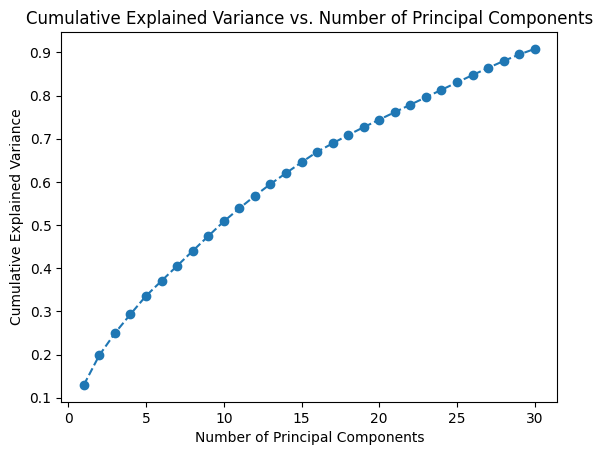

In [278]:
#getting the cummulative explained variance
# Calculate the cumulative explained variance ratio
cumulative_explained_variance = pca.explained_variance_ratio_.cumsum()

# Plot the cumulative explained variance
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

### CLUSTERING BASED ON ENGAGEMENT

In [279]:
df1 = df[['MSISDN/Number', 'Dur. (ms)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Bearer Id'	,'all_tot']]
df1.head()

,MSISDN/Number,Dur. (ms),Activity Duration DL (ms),Activity Duration UL (ms),Bearer Id,all_tot
0,3.366496e+10,1823652.0,37624.0,38787.0,1.311448e+19,345629377.0
1,3.368185e+10,1365104.0,168.0,3560.0,1.311448e+19,707185356.0
2,3.376063e+10,1361762.0,0.0,0.0,1.311448e+19,307690973.0
3,3.375034e+10,1321509.0,3330.0,37882.0,1.311448e+19,889352748.0
4,3.369980e+10,1089009.0,0.0,0.0,1.311448e+19,607681403.0


In [280]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 6 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   MSISDN/Number              150001 non-null  float64
 1   Dur. (ms)                  150001 non-null  float64
 2   Activity Duration DL (ms)  150001 non-null  float64
 3   Activity Duration UL (ms)  150001 non-null  float64
 4   Bearer Id                  150001 non-null  float64
 5   all_tot                    150001 non-null  float64
dtypes: float64(6)
memory usage: 6.9 MB


<Figure size 700x500 with 0 Axes>

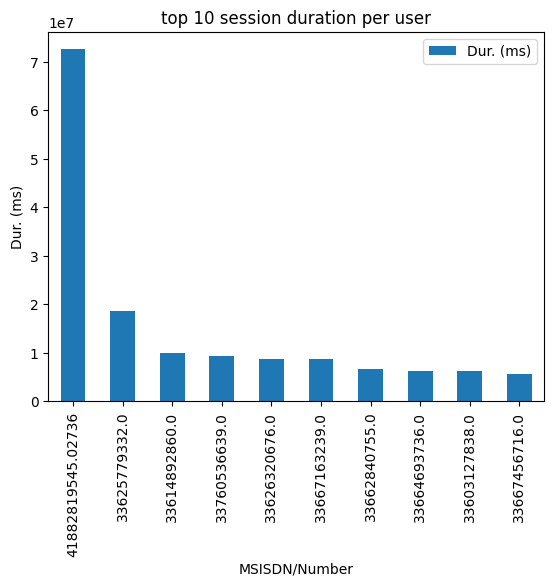

In [281]:
#getting the total session duration per user
tot_user_dur = pd.DataFrame(df1.groupby('MSISDN/Number')['Dur. (ms)'].sum())
#plotting the top 10 users
plt.figure(figsize= (7,5))
tot_user_dur.sort_values(by = 'Dur. (ms)', ascending = False).head(10).plot(kind = 'bar')
plt.title('top 10 session duration per user')
plt.xlabel('MSISDN/Number')
plt.ylabel('Dur. (ms)')
plt.show()

<Figure size 400x700 with 0 Axes>

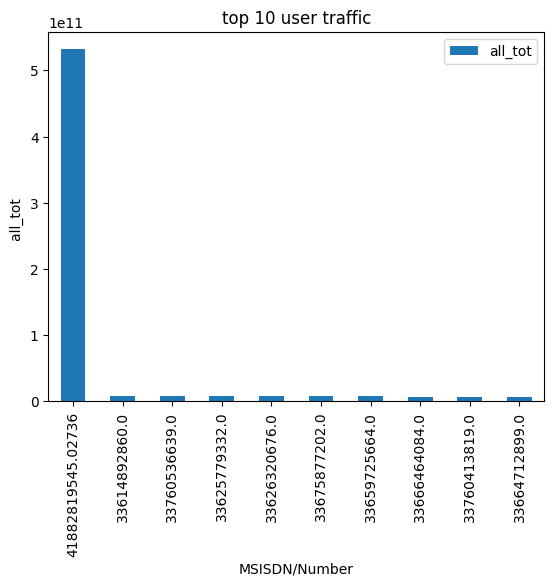

In [282]:
#session total traffic
#getting the total traffic per user
tot_traf_dur = pd.DataFrame(df1.groupby('MSISDN/Number')['all_tot'].sum())
#plotting the top 10 users
plt.figure(figsize= (4,7))
tot_traf_dur.sort_values(by = 'all_tot', ascending = False).head(10).plot(kind = 'bar')
plt.title('top 10 user traffic')
plt.xlabel('MSISDN/Number')
plt.ylabel('all_tot ')
plt.show()

**Normalizing the columns**

In [283]:
#initializing the scaler
scaler = StandardScaler()
#scaling the dataset
df1_scaled = pd.DataFrame(scaler.fit_transform(df1), columns = df1.columns)
df1_scaled.head()

,MSISDN/Number,Dur. (ms),Activity Duration DL (ms),Activity Duration UL (ms),Bearer Id,all_tot
0,-0.003370,21.213047,-0.314509,-0.295075,1.031911,-0.614351
1,-0.003363,15.554551,-0.321084,-0.302662,1.031911,0.865130
2,-0.003331,15.513311,-0.321113,-0.303429,1.031911,-0.769595
3,-0.003335,15.016588,-0.320529,-0.295270,1.031911,1.610557
4,-0.003355,12.147531,-0.321113,-0.303429,1.031911,0.457962


In [284]:
#performing kmeans
from sklearn.cluster import KMeans
#initializing the kmeans
kmeans = KMeans(n_clusters= 3, random_state = 1)
#clustering the data

df['clusters_engage'] = kmeans.fit_predict(df1_scaled)
df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Total DL (Bytes),social_tot,goog_tot,Email_tot,you_tot,netflix_tot,gaming_tot,other_tot,all_tot,clusters_engage
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,308879636.0,1570185.0,2905912.0,3701304.0,18355943.0,17855187.0,292426453.0,180558843.0,345629377.0,1
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,653384965.0,1933278.0,4414096.0,937385.0,39359124.0,35565545.0,609920783.0,541959383.0,707185356.0,1
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,279807335.0,1726277.0,10229119.0,3363124.0,34425237.0,23751202.0,229980251.0,414908351.0,307690973.0,1
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,846028530.0,657493.0,11811761.0,2070983.0,36534765.0,15092588.0,810387875.0,761837216.0,889352748.0,1
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,569138589.0,912788.0,7748843.0,2110349.0,34222253.0,17539799.0,531237049.0,564619822.0,607681403.0,1


In [285]:
#getting the value counts of clusters
df.clusters_engage.value_counts()

0    74692
1    70231
2     5078
Name: clusters_engage, dtype: int64

In [286]:
#getting the euclidean distance per customer
from sklearn.metrics.pairwise import euclidean_distances
#getting the cluster centers
clust_eng_center = kmeans.cluster_centers_
print(clust_eng_center)

[[ 3.38840663e-03  1.94184330e-03 -1.90454666e-01 -1.75734342e-01
  -9.76401501e-01 -4.87876669e-04]
 [-3.36115747e-03  1.37198464e-02 -1.09735702e-01 -1.12759579e-01
   1.01666061e+00  1.70660617e-03]
 [-3.35489208e-03 -2.18494638e-01  4.32258725e+00  4.14774959e+00
   3.00791428e-01 -1.64408367e-02]]


In [287]:
#calculating the eucledean distance
engage_dist = euclidean_distances(df1_scaled, clust_eng_center)
print(engage_dist)

[[21.3155066  21.21005461 22.39295365]
 [15.70667046 15.56739887 17.07250797]
 [15.66080584 15.5213884  17.02845935]
 ...
 [ 2.08866813  0.61256802  6.4919142 ]
 [ 2.05421819  0.48668152  6.47912694]
 [ 1.0102133   1.02886243  6.00225658]]


In [288]:
#getting the minimum dist and adding to the dataset
df['eng_dist'] = engage_dist.min(axis = 1)
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,social_tot,goog_tot,Email_tot,you_tot,netflix_tot,gaming_tot,other_tot,all_tot,clusters_engage,eng_dist
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,1570185.0,2905912.0,3701304.0,18355943.0,17855187.0,292426453.0,180558843.0,345629377.0,1,21.210055
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,1933278.0,4414096.0,937385.0,39359124.0,35565545.0,609920783.0,541959383.0,707185356.0,1,15.567399
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1726277.0,10229119.0,3363124.0,34425237.0,23751202.0,229980251.0,414908351.0,307690973.0,1,15.521388
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,657493.0,11811761.0,2070983.0,36534765.0,15092588.0,810387875.0,761837216.0,889352748.0,1,15.091468
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,912788.0,7748843.0,2110349.0,34222253.0,17539799.0,531237049.0,564619822.0,607681403.0,1,12.145732


In [289]:
df.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [290]:
#calculating the avg tcp
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,social_tot,goog_tot,Email_tot,you_tot,netflix_tot,gaming_tot,other_tot,all_tot,clusters_engage,eng_dist
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,1570185.0,2905912.0,3701304.0,18355943.0,17855187.0,292426453.0,180558843.0,345629377.0,1,21.210055
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,1933278.0,4414096.0,937385.0,39359124.0,35565545.0,609920783.0,541959383.0,707185356.0,1,15.567399
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1726277.0,10229119.0,3363124.0,34425237.0,23751202.0,229980251.0,414908351.0,307690973.0,1,15.521388
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,657493.0,11811761.0,2070983.0,36534765.0,15092588.0,810387875.0,761837216.0,889352748.0,1,15.091468
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,912788.0,7748843.0,2110349.0,34222253.0,17539799.0,531237049.0,564619822.0,607681403.0,1,12.145732


### CLUSTURING BASED ON EXPERIENCE

In [291]:
# Sum the TCP DL Retrans. Vol (Bytes) and TCP UL Retrans. Vol (Bytes) columns
df['Total TCP Retrans. Vol (Bytes)'] = df['TCP DL Retrans. Vol (Bytes)'] + df['TCP UL Retrans. Vol (Bytes)']

# Getting the average TCP transmission per customer
avg_tcp = pd.DataFrame(df.groupby('MSISDN/Number')['Total TCP Retrans. Vol (Bytes)'].mean())

print(avg_tcp.head())

               Total TCP Retrans. Vol (Bytes)
MSISDN/Number                                
3.360100e+10                     2.156957e+07
3.360100e+10                     2.156957e+07
3.360100e+10                     2.156957e+07
3.360101e+10                     7.607247e+05
3.360101e+10                     1.547020e+07


<Figure size 700x500 with 0 Axes>

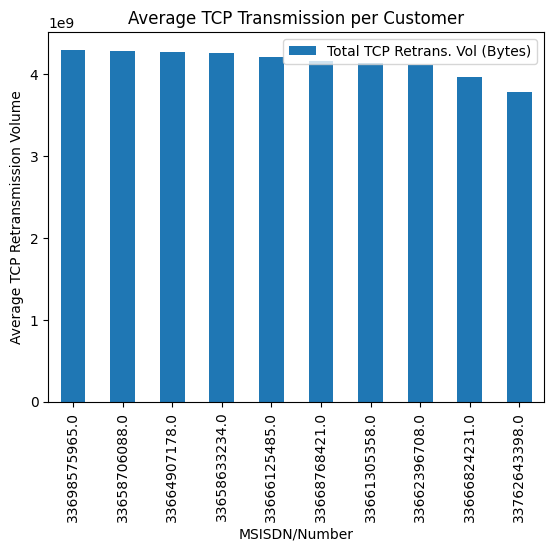

In [292]:
# Plotting the average TCP transmission per customer
plt.figure(figsize=(7, 5))
avg_tcp.sort_values(by = 'Total TCP Retrans. Vol (Bytes)', ascending = False).head(10).plot(kind='bar')
plt.title('Average TCP Transmission per Customer')
plt.xlabel('MSISDN/Number')
plt.ylabel('Average TCP Retransmission Volume')
plt.show()

**Getting the average RRT of the customers**

In [293]:
# Sum the TCP DL Retrans. Vol (Bytes) and TCP UL Retrans. Vol (Bytes) columns
df['Total RTT Trans (ms)'] = df['Avg RTT DL (ms)'] + df['Avg RTT UL (ms)']

# Getting the average TCP transmission per customer
avg_rrt = pd.DataFrame(df.groupby('MSISDN/Number')['Total RTT Trans (ms)'].mean())

print(avg_rrt.head())

               Total RTT Trans (ms)
MSISDN/Number                      
3.360100e+10              46.000000
3.360100e+10              31.000000
3.360100e+10             127.458589
3.360101e+10              84.000000
3.360101e+10              59.500000


<Figure size 700x500 with 0 Axes>

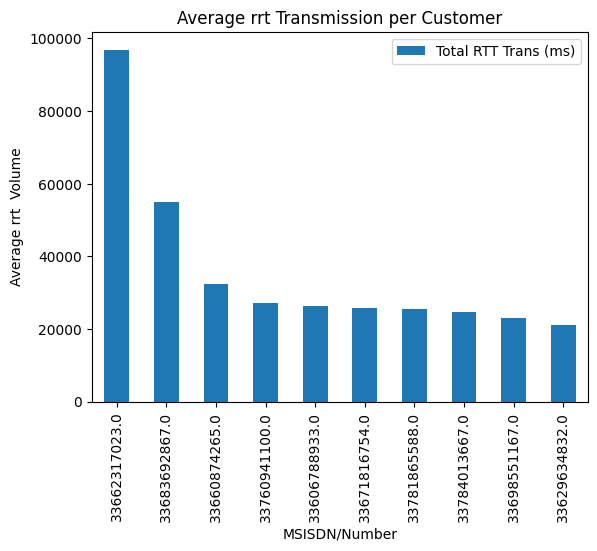

In [294]:
# Plotting the average rrt transmission per customer
plt.figure(figsize=(7, 5))
avg_rrt.sort_values(by = 'Total RTT Trans (ms)', ascending = False).head(10).plot(kind='bar')
plt.title('Average rrt Transmission per Customer')
plt.xlabel('MSISDN/Number')
plt.ylabel('Average rrt  Volume')
plt.show()

In [295]:
#Getting the handsets that a customer uses
handset_cust = pd.DataFrame(df.groupby('MSISDN/Number')['Handset Type'].value_counts())
print(handset_cust.head())

                                              Handset Type
MSISDN/Number Handset Type                                
3.360100e+10  Huawei P20 Lite Huawei Nova 3E             1
              Apple iPhone 7 (A1778)                     1
              undefined                                  1
3.360101e+10  Apple iPhone 5S (A1457)                    1
              Apple iPhone Se (A1723)                    2


**Getting the average throughput**

In [296]:
# Sum the TCP DL Retrans. Vol (Bytes) and TCP UL Retrans. Vol (Bytes) columns
df['Total Bearer TP (kbps)'] = df['Avg Bearer TP DL (kbps)'] + df['Avg Bearer TP UL (kbps)']

# Getting the average TCP transmission per customer
avg_tp = pd.DataFrame(df.groupby('MSISDN/Number')['Total Bearer TP (kbps)'].mean())

print(avg_tp.head())

               Total Bearer TP (kbps)
MSISDN/Number                        
3.360100e+10                     76.0
3.360100e+10                     99.0
3.360100e+10                     97.0
3.360101e+10                    248.0
3.360101e+10                  28422.0


<Figure size 700x500 with 0 Axes>

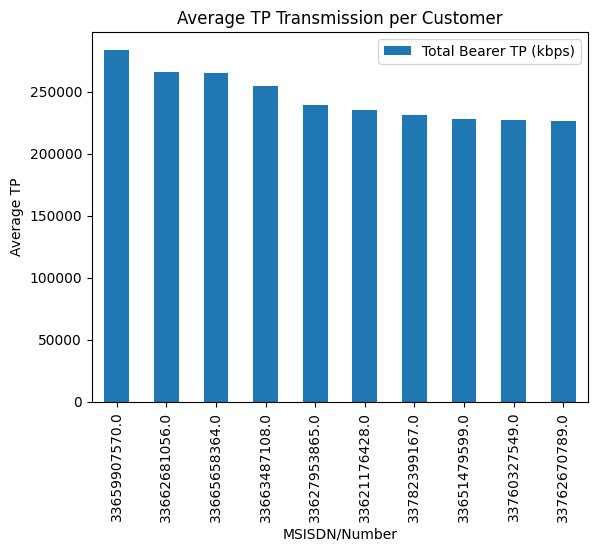

In [297]:
# Plotting the average rrt transmission per customer
plt.figure(figsize=(7, 5))
avg_tp.sort_values(by = 'Total Bearer TP (kbps)', ascending = False).head(10).plot(kind='bar')
plt.title('Average TP Transmission per Customer')
plt.xlabel('MSISDN/Number')
plt.ylabel('Average TP')
plt.show()

**top, bottom and most frequent values**
---

*TCP DL Retrans. Vol (Bytes)*
- TOP 10 IN DESCENDING ORDER

In [298]:
#getting the top 10 tcp transmissions
desc_tcp_dl = df[['MSISDN/Number','TCP DL Retrans. Vol (Bytes)']].sort_values(by = 'TCP DL Retrans. Vol (Bytes)', ascending = False)
desc_tcp_dl.set_index('MSISDN/Number', inplace=True)
desc_tcp_dl.head()

,TCP DL Retrans. Vol (Bytes)
MSISDN/Number,
3.376211e+10,4.294426e+09
3.365872e+10,4.291380e+09
3.366045e+10,4.289877e+09
3.369858e+10,4.289488e+09
3.365871e+10,4.288060e+09


<Figure size 700x500 with 0 Axes>

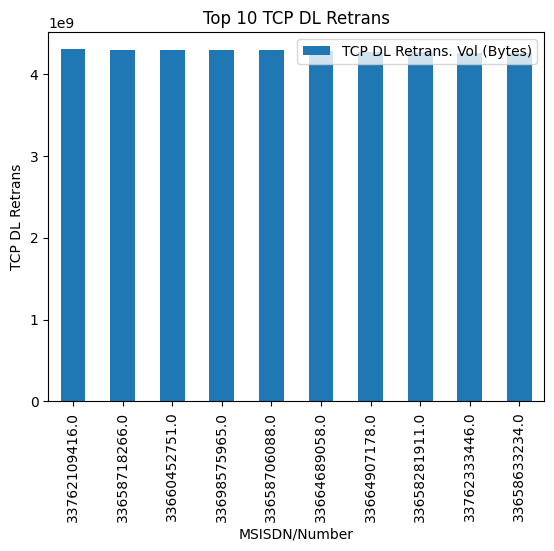

In [299]:
#plotting the top 10 values
# Plotting the average rrt transmission per customer
plt.figure(figsize=(7, 5))
desc_tcp_dl.head(10).plot(kind='bar')
plt.title('Top 10 TCP DL Retrans')
plt.xlabel('MSISDN/Number')
plt.ylabel('TCP DL Retrans')
plt.show()

- TOP 10 IN ASCENDING ORDER

In [300]:
#getting the top 10 tcp transmissions
asc_tcp_dl = df[['MSISDN/Number','TCP DL Retrans. Vol (Bytes)']].sort_values(by = 'TCP DL Retrans. Vol (Bytes)', ascending = True)
asc_tcp_dl.set_index('MSISDN/Number', inplace=True)
asc_tcp_dl.head()

,TCP DL Retrans. Vol (Bytes)
MSISDN/Number,
3.366454e+10,2.0
3.376154e+10,2.0
3.369906e+10,4.0
3.366933e+10,4.0
3.376394e+10,4.0


<Figure size 700x500 with 0 Axes>

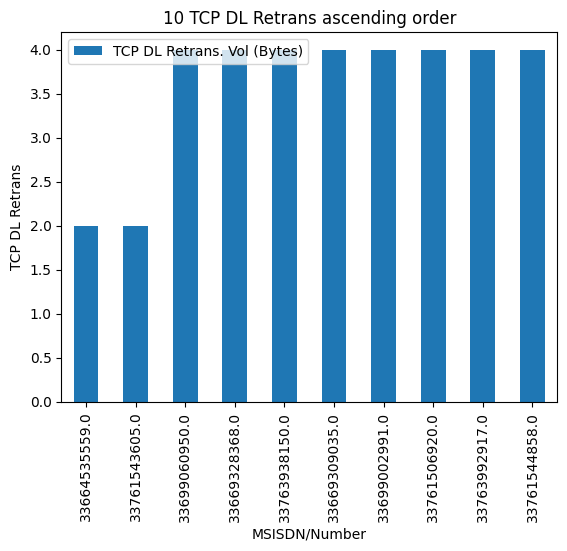

In [301]:
#plotting the 10 values in ascending order

plt.figure(figsize=(7, 5))
asc_tcp_dl.head(10).plot(kind='bar')
plt.title('10 TCP DL Retrans ascending order')
plt.xlabel('MSISDN/Number')
plt.ylabel('TCP DL Retrans')
plt.show()

*TCP UL Retrans. Vol (Bytes)*
- TOP 10 IN DESCENDING ORDER

In [302]:
#getting the top 10 tcp transmissions
desc_tcp_ul = df[['MSISDN/Number','TCP UL Retrans. Vol (Bytes)']].sort_values(by = 'TCP UL Retrans. Vol (Bytes)', ascending = False)
desc_tcp_ul.set_index('MSISDN/Number', inplace=True)
desc_tcp_ul.head()

,TCP UL Retrans. Vol (Bytes)
MSISDN/Number,
3.366905e+10,2.908226e+09
3.365825e+10,2.636857e+09
3.376359e+10,2.455600e+09
3.366905e+10,2.260359e+09
3.366470e+10,1.751384e+09


<Figure size 700x500 with 0 Axes>

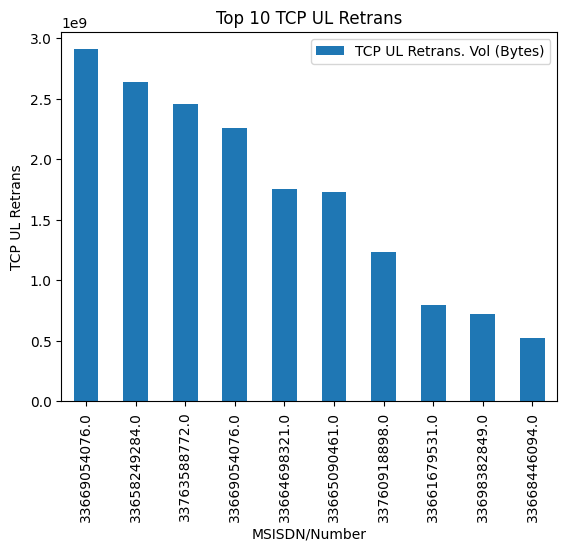

In [303]:
#plotting the top 10 values
# Plotting the average rrt transmission per customer
plt.figure(figsize=(7, 5))
desc_tcp_ul.head(10).plot(kind='bar')
plt.title('Top 10 TCP UL Retrans')
plt.xlabel('MSISDN/Number')
plt.ylabel('TCP UL Retrans')
plt.show()

- TOP 10 IN ASCENDING ORDER

In [304]:
#getting the top 10 tcp transmissions
asc_tcp_ul = df[['MSISDN/Number','TCP UL Retrans. Vol (Bytes)']].sort_values(by = 'TCP UL Retrans. Vol (Bytes)', ascending = True)
asc_tcp_ul.set_index('MSISDN/Number', inplace=True)
asc_tcp_ul.head()

,TCP UL Retrans. Vol (Bytes)
MSISDN/Number,
3.364280e+10,1.0
3.365834e+10,1.0
3.376207e+10,1.0
3.365855e+10,1.0
3.366574e+10,1.0


<Figure size 700x500 with 0 Axes>

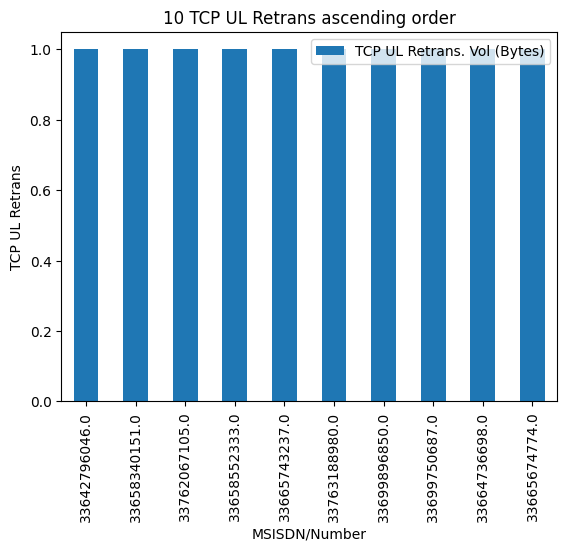

In [305]:
#plotting the 10 values in ascending order

plt.figure(figsize=(7, 5))
asc_tcp_ul.head(10).plot(kind='bar')
plt.title('10 TCP UL Retrans ascending order')
plt.xlabel('MSISDN/Number')
plt.ylabel('TCP UL Retrans')
plt.show()

*Avg RTT DL (ms)*
- TOP 10 IN DESCENDING ORDER

In [306]:
#getting the top 10 rtt transmissions
desc_rtt_dl = df[['MSISDN/Number','Avg RTT DL (ms)']].sort_values(by = 'Avg RTT DL (ms)', ascending = False)
desc_rtt_dl.set_index('MSISDN/Number', inplace=True)
desc_rtt_dl.head()

,Avg RTT DL (ms)
MSISDN/Number,
3.366232e+10,96923.0
3.366087e+10,64640.0
4.188282e+10,55811.0
3.368369e+10,54847.0
3.376094e+10,26971.0


<Figure size 700x500 with 0 Axes>

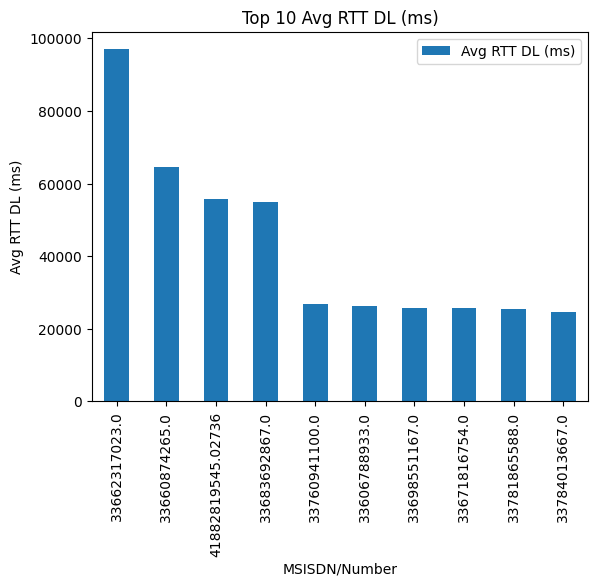

In [307]:
#plotting the top 10 values
# Plotting the average rrt transmission per customer
plt.figure(figsize=(7, 5))
desc_rtt_dl.head(10).plot(kind='bar')
plt.title('Top 10 Avg RTT DL (ms)')
plt.xlabel('MSISDN/Number')
plt.ylabel('Avg RTT DL (ms)')
plt.show()

- TOP 10 IN ASCENDING ORDER

In [308]:
#getting the top 10 rtt transmissions
desc_rtt_dl = df[['MSISDN/Number','Avg RTT DL (ms)']].sort_values(by = 'Avg RTT DL (ms)', ascending = True)
desc_rtt_dl.set_index('MSISDN/Number', inplace=True)
desc_rtt_dl.head()

,Avg RTT DL (ms)
MSISDN/Number,
3.366064e+10,0.0
3.376275e+10,0.0
3.366158e+10,0.0
3.369954e+10,0.0
3.364275e+10,0.0


*Avg RTT UL (ms)*
- TOP 10 IN DESCENDING ORDER

In [309]:
#getting the top 10 rtt transmissions
desc_rtt_ul = df[['MSISDN/Number','Avg RTT UL (ms)']].sort_values(by = 'Avg RTT UL (ms)', ascending = False)
desc_rtt_ul.set_index('MSISDN/Number', inplace=True)
desc_rtt_ul.head()

,Avg RTT UL (ms)
MSISDN/Number,
3.365978e+10,7120.0
3.363330e+10,5607.0
3.376109e+10,5422.0
3.362785e+10,5279.0
3.366850e+10,4677.0


<Figure size 700x500 with 0 Axes>

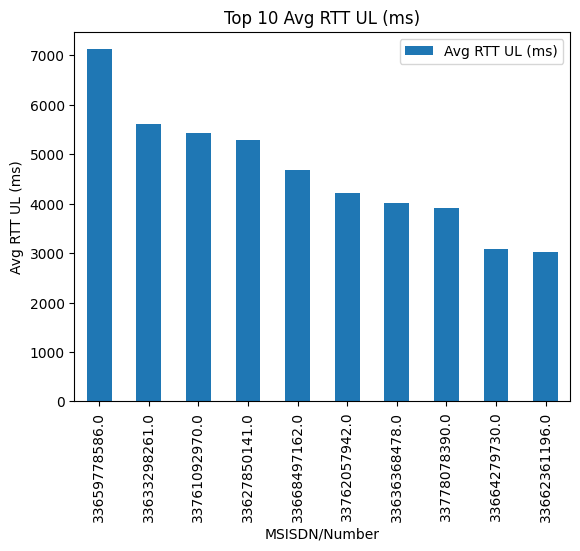

In [310]:
#plotting the top 10 values
# Plotting the average rrt transmission per customer
plt.figure(figsize=(7, 5))
desc_rtt_ul.head(10).plot(kind='bar')
plt.title('Top 10 Avg RTT UL (ms)')
plt.xlabel('MSISDN/Number')
plt.ylabel('Avg RTT UL (ms)')
plt.show()

- TOP 10 IN ASCENDING ORDER

In [311]:
#getting the top 10 rtt transmissions
asc_rtt_ul = df[['MSISDN/Number','Avg RTT UL (ms)']].sort_values(by = 'Avg RTT UL (ms)', ascending = True)
asc_rtt_ul.set_index('MSISDN/Number', inplace=True)
asc_rtt_ul.head()

,Avg RTT UL (ms)
MSISDN/Number,
3.369924e+10,0.0
3.366406e+10,0.0
3.365855e+10,0.0
3.362108e+10,0.0
3.376185e+10,0.0


*Avg Bearer TP DL (kbps)*
- TOP 10 IN DESCENDING ORDER

In [312]:
#Getting the 5 tp transmissions
desc_tp_dl = df[['MSISDN/Number','Avg Bearer TP DL (kbps)']].sort_values(by = 'Avg Bearer TP DL (kbps)', ascending = False)
desc_tp_dl.set_index('MSISDN/Number', inplace = True)
desc_tp_dl.head()

,Avg Bearer TP DL (kbps)
MSISDN/Number,
3.366117e+10,378160.0
3.369817e+10,299257.0
3.367251e+10,299002.0
3.365169e+10,276040.0
3.366856e+10,269362.0


<Figure size 700x500 with 0 Axes>

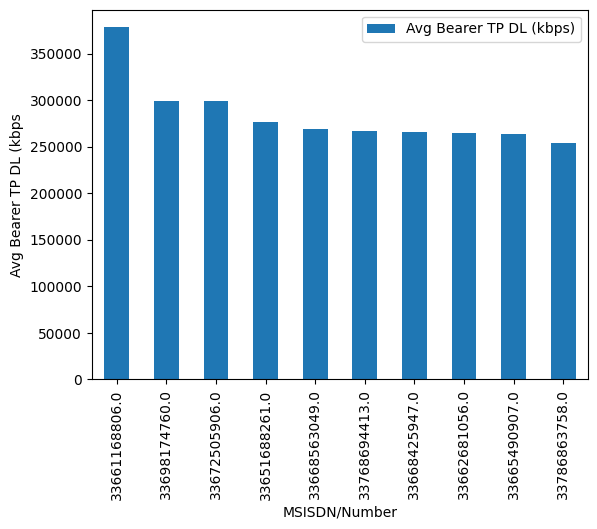

In [313]:
#plotting the tp transmissions
plt.figure(figsize = (7,5))
desc_tp_dl.head(10).plot(kind = 'bar')
plt.xlabel('MSISDN/Number')
plt.ylabel('Avg Bearer TP DL (kbps')
plt.show()

- TOP 10 IN ASCENDING ORDER

In [314]:
#Getting the 5 tp transmissions
asc_tp_dl = df[['MSISDN/Number','Avg Bearer TP DL (kbps)']].sort_values(by = 'Avg Bearer TP DL (kbps)', ascending = True)
asc_tp_dl.set_index('MSISDN/Number', inplace = True)
asc_tp_dl.head(10)

,Avg Bearer TP DL (kbps)
MSISDN/Number,
3.360145e+10,0.0
3.361898e+10,0.0
3.365044e+10,0.0
3.376317e+10,0.0
3.376080e+10,0.0
3.366284e+10,0.0
3.376318e+10,0.0
3.378338e+10,0.0
3.360889e+10,0.0


*Avg Bearer TP UL (kbps)*
- DESCENDING ORDER

In [315]:
#Getting the 5 tp transmissions
desc_tp_ul = df[['MSISDN/Number','Avg Bearer TP UL (kbps)']].sort_values(by = 'Avg Bearer TP UL (kbps)', ascending = False)
desc_tp_ul.set_index('MSISDN/Number', inplace = True)
desc_tp_ul.head()

,Avg Bearer TP UL (kbps)
MSISDN/Number,
3.361508e+10,58613.0
3.378308e+10,57792.0
3.362990e+10,57750.0
3.366126e+10,57006.0
3.369521e+10,56763.0


<Figure size 700x500 with 0 Axes>

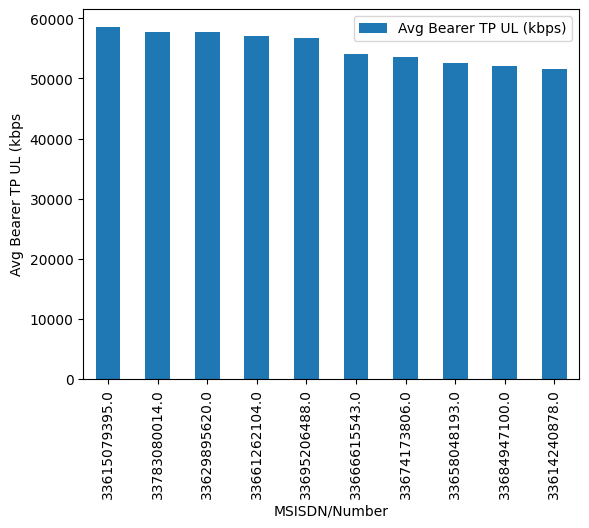

In [316]:
#plotting the tp transmissions
plt.figure(figsize = (7,5))
desc_tp_ul.head(10).plot(kind = 'bar')
plt.xlabel('MSISDN/Number')
plt.ylabel('Avg Bearer TP UL (kbps')
plt.show()

- ASCENDING ORDER

In [317]:
#Getting the 5 tp transmissions
asc_tp_ul = df[['MSISDN/Number','Avg Bearer TP UL (kbps)']].sort_values(by = 'Avg Bearer TP UL (kbps)', ascending = True)
asc_tp_ul.set_index('MSISDN/Number', inplace = True)
asc_tp_ul.head(10)

,Avg Bearer TP UL (kbps)
MSISDN/Number,
3.365805e+10,0.0
3.376170e+10,0.0
3.363716e+10,0.0
3.365015e+10,0.0
4.188282e+10,0.0
3.366631e+10,0.0
3.368911e+10,0.0
3.376121e+10,0.0
3.365841e+10,0.0


**The distribution of the average throughput  per handset type**

In [318]:
#getting the distribution of the TP per handset type
tp_handset = pd.DataFrame(df.groupby('Handset Type')['Total Bearer TP (kbps)'].mean())
tp_handset.head()

,Total Bearer TP (kbps)
Handset Type,
A-Link Telecom I. Cubot A5,23510.0
A-Link Telecom I. Cubot Note Plus,6699.0
A-Link Telecom I. Cubot Note S,8937.0
A-Link Telecom I. Cubot Nova,56217.0
A-Link Telecom I. Cubot Power,69468.0


<Figure size 700x500 with 0 Axes>

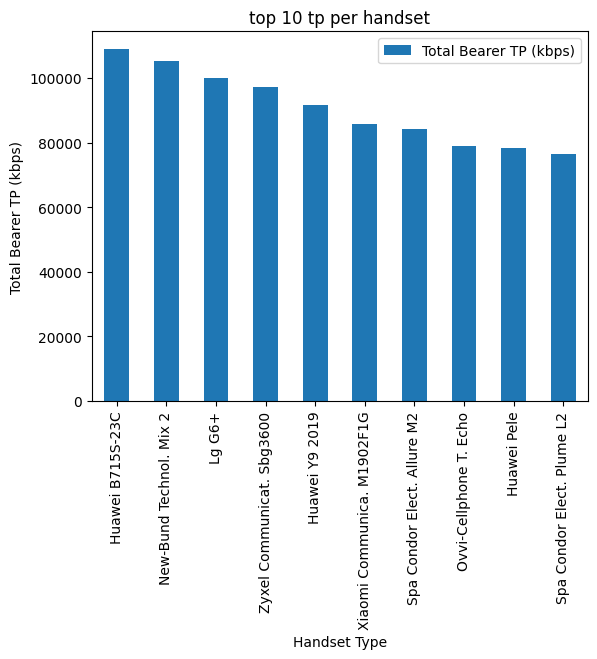

In [319]:
#plotting the avg tp per handset
plt.figure(figsize = (7,5))
tp_handset.sort_values(by = 'Total Bearer TP (kbps)', ascending = False).head(10).plot(kind = 'bar')
plt.title('top 10 tp per handset')
plt.xlabel('Handset Type')
plt.ylabel('Total Bearer TP (kbps)')
plt.show()

Huawei B7 has the highest throughput. This might be one of the reasons why many people are using it

---
**The average TCP retransmission view per handset type**

In [320]:
#getting the distribution of the TCP per handset type
tcp_handset = pd.DataFrame(df.groupby('Handset Type')['Total TCP Retrans. Vol (Bytes)'].mean())
tcp_handset.head()

,Total TCP Retrans. Vol (Bytes)
Handset Type,
A-Link Telecom I. Cubot A5,2.156957e+07
A-Link Telecom I. Cubot Note Plus,6.162130e+05
A-Link Telecom I. Cubot Note S,4.141173e+07
A-Link Telecom I. Cubot Nova,1.371700e+05
A-Link Telecom I. Cubot Power,8.041000e+03


<Figure size 700x500 with 0 Axes>

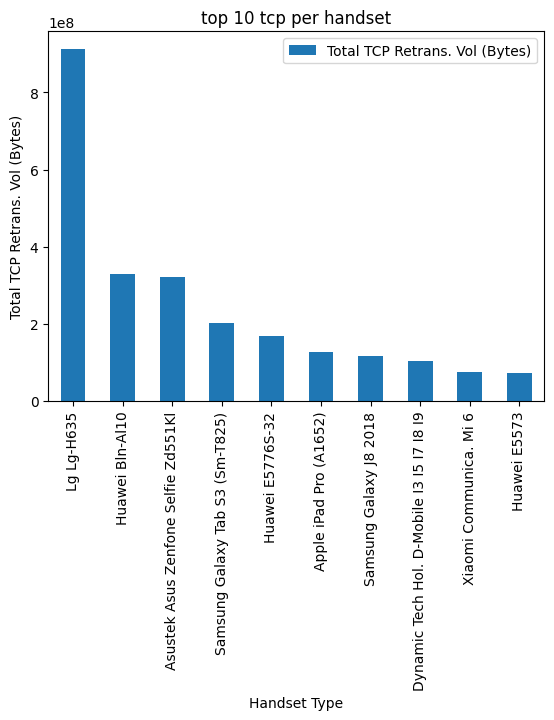

In [321]:
#plotting the avg tp per handset
plt.figure(figsize = (7,5))
tcp_handset.sort_values(by = 'Total TCP Retrans. Vol (Bytes)', ascending = False).head(10).plot(kind = 'bar')
plt.title('top 10 tcp per handset')
plt.xlabel('Handset Type')
plt.ylabel('Total TCP Retrans. Vol (Bytes)')
plt.show()

In [322]:
df.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


### KMEANS CLUSTERING

In [323]:
#GETTING THE NUMERIC COLUMNS
df_num = df[['Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)']]
df_num.head()

,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes)
0,42.000000,5.000000,23.0,44.0,2.080991e+07,759658.664811
1,65.000000,5.000000,16.0,26.0,2.080991e+07,759658.664811
2,109.795706,17.662883,6.0,9.0,2.080991e+07,759658.664811
3,109.795706,17.662883,44.0,44.0,2.080991e+07,759658.664811
4,109.795706,17.662883,6.0,9.0,2.080991e+07,759658.664811


In [324]:
#scaling the data
scaler = StandardScaler()
df_num_sc = pd.DataFrame(scaler.fit_transform(df_num), columns = df_num.columns)
df_num_sc.head()

,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes)
0,-0.121206,-1.654637e-01,-0.553863,-0.373256,3.177621e-17,0.0
1,-0.080087,-1.654637e-01,-0.554155,-0.377147,3.177621e-17,0.0
2,0.000000,-4.642269e-17,-0.554572,-0.380823,3.177621e-17,0.0
3,0.000000,-4.642269e-17,-0.552987,-0.373256,3.177621e-17,0.0
4,0.000000,-4.642269e-17,-0.554572,-0.380823,3.177621e-17,0.0


In [325]:
#importing kmeans library
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances

#initializing the kmeans
kmeans = KMeans(n_clusters= 3, random_state = 1)

#clustering the data
df['cluster'] = kmeans.fit_predict(df_num_sc)
df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,netflix_tot,gaming_tot,other_tot,all_tot,clusters_engage,eng_dist,Total TCP Retrans. Vol (Bytes),Total RTT Trans (ms),Total Bearer TP (kbps),cluster
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,17855187.0,292426453.0,180558843.0,345629377.0,1,21.210055,2.156957e+07,47.000000,67.0,0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,35565545.0,609920783.0,541959383.0,707185356.0,1,15.567399,2.156957e+07,70.000000,42.0,0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,23751202.0,229980251.0,414908351.0,307690973.0,1,15.521388,2.156957e+07,127.458589,15.0,0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,15092588.0,810387875.0,761837216.0,889352748.0,1,15.091468,2.156957e+07,127.458589,88.0,0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,17539799.0,531237049.0,564619822.0,607681403.0,1,12.145732,2.156957e+07,127.458589,15.0,0


In [326]:
df.cluster.value_counts()

0    128424
1     21570
2         7
Name: cluster, dtype: int64

In [327]:
#getting the cluster centers
clust_cent = kmeans.cluster_centers_
print(clust_cent)

[[ 8.71955125e-03 -4.21961729e-02 -3.16975377e-01 -2.77030595e-01
  -4.31972292e-02 -8.56752976e-03]
 [-5.21073917e-02  2.52138474e-01  1.89379673e+00  1.65481056e+00
   2.58043152e-01  7.06104266e-03]
 [-2.31318084e-02  1.81740549e-01  2.14503767e+00  2.89629088e+00
   4.22604133e-01  1.35582769e+02]]


In [328]:
#calculating the eucledean distances
distances = euclidean_distances(df_num_sc, clust_cent) #this is the distance from the centroids
print(distances)

[[  0.31526182   3.21712492 135.65017478]
 [  0.3021561    3.21918165 135.65025094]
 [  0.26649755   3.20487718 135.6500154 ]
 ...
 [  0.30880248   3.21437275 135.65010845]
 [  0.31916942   3.21793455 135.65020889]
 [  0.42545892   2.54121805 135.63144547]]


In [329]:
#getting the experience score
df['experience'] = distances.min(axis= 1)# getting the minimum distance from the clusters
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,gaming_tot,other_tot,all_tot,clusters_engage,eng_dist,Total TCP Retrans. Vol (Bytes),Total RTT Trans (ms),Total Bearer TP (kbps),cluster,experience
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,292426453.0,180558843.0,345629377.0,1,21.210055,2.156957e+07,47.000000,67.0,0,0.315262
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,609920783.0,541959383.0,707185356.0,1,15.567399,2.156957e+07,70.000000,42.0,0,0.302156
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,229980251.0,414908351.0,307690973.0,1,15.521388,2.156957e+07,127.458589,15.0,0,0.266498
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,810387875.0,761837216.0,889352748.0,1,15.091468,2.156957e+07,127.458589,88.0,0,0.262215
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,531237049.0,564619822.0,607681403.0,1,12.145732,2.156957e+07,127.458589,15.0,0,0.266498


In [330]:
#getting the engagement cluster scores
exp_scores = pd.DataFrame(df.groupby('cluster')['experience'].mean())
exp_scores.head()

,experience
cluster,
0,0.558684
1,2.424087
2,30.997426


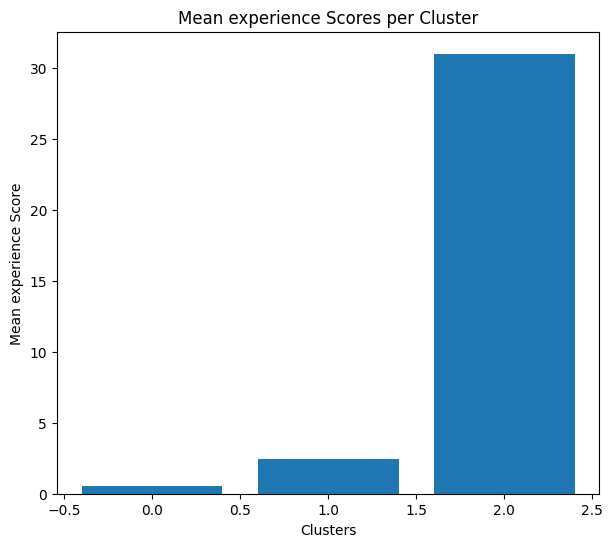

In [331]:
# Plotting the mean engagement scores per cluster
plt.figure(figsize=(7, 6))
plt.bar(exp_scores.index, exp_scores['experience'])
plt.title('Mean experience Scores per Cluster')
plt.xlabel('Clusters')
plt.ylabel('Mean experience Score')
plt.show()

The worst experience cluster is 2.0 cluster

---
**Euclidean distance between each user's data point and the centroid of the worst experience's cluster**

In [332]:
#initializing the worst cluster
worst_exper= exp_scores['experience'].max()
print(worst_exper)

30.99742598301259


In [333]:
#getting the euclidean distance
df['dist_from_worst_exp'] = (df['experience'] - worst_exper) ** 2 #this is to remove the negatives and get an understandable value
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,other_tot,all_tot,clusters_engage,eng_dist,Total TCP Retrans. Vol (Bytes),Total RTT Trans (ms),Total Bearer TP (kbps),cluster,experience,dist_from_worst_exp
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,180558843.0,345629377.0,1,21.210055,2.156957e+07,47.000000,67.0,0,0.315262,941.395197
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,541959383.0,707185356.0,1,15.567399,2.156957e+07,70.000000,42.0,0,0.302156,942.199593
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,414908351.0,307690973.0,1,15.521388,2.156957e+07,127.458589,15.0,0,0.266498,944.389962
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,761837216.0,889352748.0,1,15.091468,2.156957e+07,127.458589,88.0,0,0.262215,944.653201
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,564619822.0,607681403.0,1,12.145732,2.156957e+07,127.458589,15.0,0,0.266498,944.389962


In [334]:
#grouping the users per experience and getting the users with the best experience
user_experience = pd.DataFrame(df.groupby('MSISDN/Number')['dist_from_worst_exp'].mean())
user_experience.head()

,dist_from_worst_exp
MSISDN/Number,
3.360100e+10,939.672176
3.360100e+10,939.461714
3.360100e+10,944.686714
3.360101e+10,942.674202
3.360101e+10,896.261102


<Figure size 700x500 with 0 Axes>

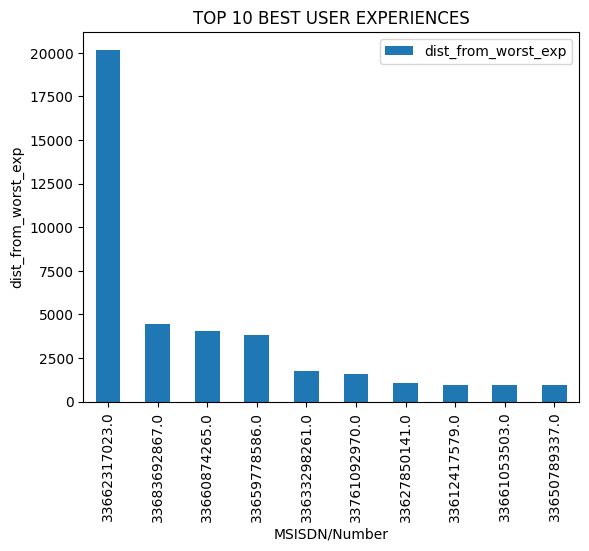

In [335]:
#plotting users with the best exp
plt.figure(figsize = (7,5))
user_experience.sort_values(by = 'dist_from_worst_exp', ascending = False).head(10).plot(kind = 'bar')
plt.title('TOP 10 BEST USER EXPERIENCES')
plt.xlabel('MSISDN/Number')
plt.ylabel('dist_from_worst_exp')
plt.show()

In [336]:
#getting the value counts of the different classes
df.cluster.value_counts()

0    128424
1     21570
2         7
Name: cluster, dtype: int64

### CALCULATING EUCLIDEAN DISTANCE

**Euclidean distance between each user's data point and the centroid of the worst engament's cluster**

In [337]:
#getting the mean of each cluster
engage_clust = pd.DataFrame(df.groupby('clusters_engage')['eng_dist'].mean())
engage_clust.head()

,eng_dist
clusters_engage,
0,1.295700
1,1.346161
2,3.157829


In [338]:
eng_exp = engage_clust['eng_dist'].max()
#getting the euclidean distance
df['dist_from_worst_engage'] = (df['eng_dist'] - eng_exp) ** 2
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,all_tot,clusters_engage,eng_dist,Total TCP Retrans. Vol (Bytes),Total RTT Trans (ms),Total Bearer TP (kbps),cluster,experience,dist_from_worst_exp,dist_from_worst_engage
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,345629377.0,1,21.210055,2.156957e+07,47.000000,67.0,0,0.315262,941.395197,325.882861
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,707185356.0,1,15.567399,2.156957e+07,70.000000,42.0,0,0.302156,942.199593,153.997432
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,307690973.0,1,15.521388,2.156957e+07,127.458589,15.0,0,0.266498,944.389962,152.857609
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,889352748.0,1,15.091468,2.156957e+07,127.458589,88.0,0,0.262215,944.653201,142.411758
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,607681403.0,1,12.145732,2.156957e+07,127.458589,15.0,0,0.266498,944.389962,80.782405


In [339]:
#grouping the engagements per customer
#grouping the users per experience and getting the users with the best experience
user_engagement = pd.DataFrame(df.groupby('MSISDN/Number')['dist_from_worst_engage'].mean())
user_engagement.head()

,dist_from_worst_engage
MSISDN/Number,
3.360100e+10,2.441533
3.360100e+10,2.168007
3.360100e+10,6.632879
3.360101e+10,5.541521
3.360101e+10,2.631498


In [340]:
user_engagement.sort_values(by = 'dist_from_worst_engage', ascending = False).head(10)

,dist_from_worst_engage
MSISDN/Number,
8.823971e+14,128719.685545
3.370000e+14,18230.815195
3.366944e+10,580.511042
3.366926e+10,224.207874
3.365850e+10,211.300692
3.366512e+10,211.070884
3.369863e+10,208.507105
3.376375e+10,208.458801
3.366393e+10,208.437988


<Figure size 700x500 with 0 Axes>

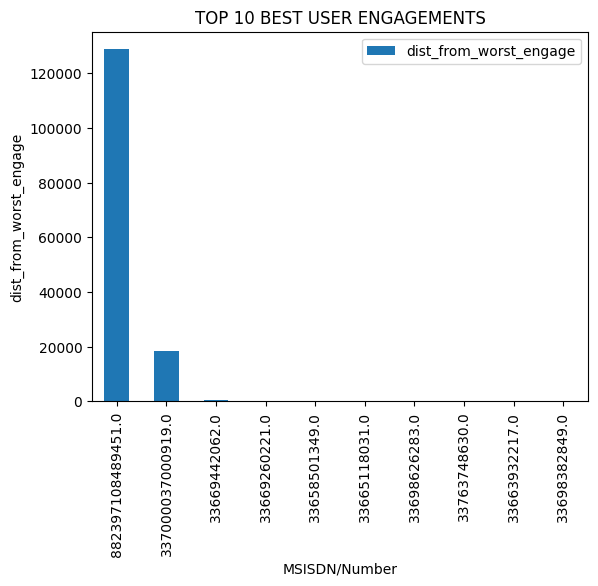

In [341]:
#plotting users with the best eng
plt.figure(figsize = (7,5))
user_engagement.sort_values(by = 'dist_from_worst_engage', ascending = False).head(10).plot(kind = 'bar')
plt.title('TOP 10 BEST USER ENGAGEMENTS')
plt.xlabel('MSISDN/Number')
plt.ylabel('dist_from_worst_engage')
plt.show()

**Getting customer satisfaction score**

In [342]:
cust_satisfaction = df[['dist_from_worst_exp', 'dist_from_worst_engage', 'MSISDN/Number']]
cust_satisfaction['score'] = (cust_satisfaction['dist_from_worst_exp'] + cust_satisfaction['dist_from_worst_engage'])/2
cust_satisfaction.head()

<ipython-input-342-7ab654066a50>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_satisfaction['score'] = (cust_satisfaction['dist_from_worst_exp'] + cust_satisfaction['dist_from_worst_engage'])/2


,dist_from_worst_exp,dist_from_worst_engage,MSISDN/Number,score
0,941.395197,325.882861,3.366496e+10,633.639029
1,942.199593,153.997432,3.368185e+10,548.098513
2,944.389962,152.857609,3.376063e+10,548.623786
3,944.653201,142.411758,3.375034e+10,543.532480
4,944.389962,80.782405,3.369980e+10,512.586184


In [343]:
#grouping customers with the best user expereince
best_exp = pd.DataFrame(cust_satisfaction.sort_values(by = 'score', ascending = False).head(10))
best_exp

,dist_from_worst_exp,dist_from_worst_engage,MSISDN/Number,score
125040,944.333898,128719.685545,8.823971e+14,64832.009722
30166,20186.335808,3.414943,3.366232e+10,10094.875376
126057,944.467942,18230.815195,3.370000e+14,9587.641568
29927,7117.047374,3.764059,3.366087e+10,3560.405716
17910,4702.940830,1.661823,4.188282e+10,2352.301326
5989,4469.545336,4.388818,3.368369e+10,2236.967077
20027,3795.669995,3.001193,3.365978e+10,1899.335594
132557,1751.850203,4.275885,3.363330e+10,878.063044
85020,1554.573719,5.244833,3.376109e+10,779.909276
51773,940.652086,580.511042,3.366944e+10,760.581564


### CLUSTERING TO GET CUSTOMER SATISFACTION
**Kmeans on engagement and experience score**

In [344]:
ex_eng_df = cust_satisfaction[['dist_from_worst_engage', 'dist_from_worst_exp']]
#scaling the data
en_ex_sca = pd.DataFrame(scaler.fit_transform(ex_eng_df))
#initializing the kmeans
kmeans1 = KMeans(n_clusters=2, random_state=1)
#fitting the kmeans to the data
cust_satisfaction['cluster'] = kmeans1.fit_predict(en_ex_sca)
cust_satisfaction.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-344-75854fc349d2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_satisfaction['cluster'] = kmeans1.fit_predict(en_ex_sca)


,dist_from_worst_exp,dist_from_worst_engage,MSISDN/Number,score,cluster
0,941.395197,325.882861,3.366496e+10,633.639029,0
1,942.199593,153.997432,3.368185e+10,548.098513,0
2,944.389962,152.857609,3.376063e+10,548.623786,0
3,944.653201,142.411758,3.375034e+10,543.532480,0
4,944.389962,80.782405,3.369980e+10,512.586184,0


In [350]:
cust_satisfaction.cluster.value_counts()

0    150000
1         1
Name: cluster, dtype: int64

In [345]:
#getting the cluster centers
clust_cent1 = kmeans1.cluster_centers_
print(clust_cent1)

[[-2.55612178e-03 -2.27520591e-06]
 [ 3.83418267e+02  3.41280887e-01]]


In [346]:

#calculating the eucledean distances
distances1 = euclidean_distances(en_ex_sca, clust_cent1) #this is the distance from the centroids
print(distances1)

[[1.00684676e+00 3.82462471e+02]
 [5.47814845e-01 3.82974487e+02]
 [5.59549925e-01 3.82977881e+02]
 ...
 [3.13176407e-01 3.83413920e+02]
 [3.06175982e-01 3.83411965e+02]
 [2.33881297e-01 3.83419493e+02]]


In [347]:
# aggregating the cust satisfaction and expereince per cluster
clust_avg_scores = pd.DataFrame(cust_satisfaction.groupby('cluster')[['score', 'dist_from_worst_exp']].mean())
clust_avg_scores.head()

,score,dist_from_worst_exp
cluster,,
0,458.854297,913.547835
1,64832.009722,944.333898


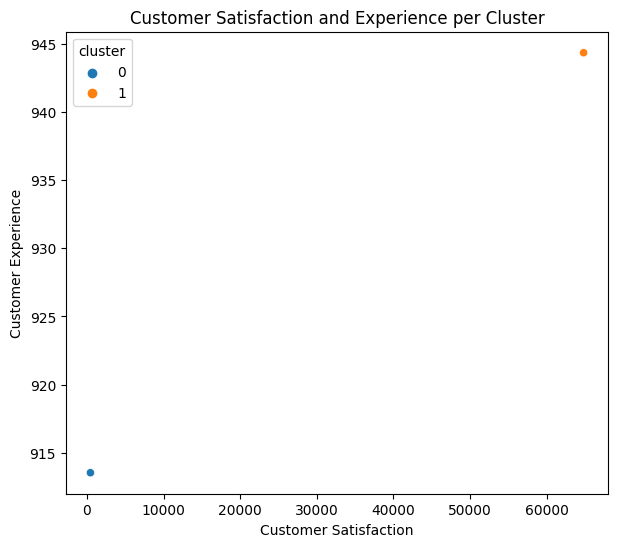

In [348]:
# Plotting the values
plt.figure(figsize=(7, 6))
sns.scatterplot(x='score', y='dist_from_worst_exp', hue='cluster', data=clust_avg_scores)
plt.title('Customer Satisfaction and Experience per Cluster')
plt.xlabel('Customer Satisfaction')
plt.ylabel('Customer Experience')
plt.show()

In [349]:
df.columns


Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',
